[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Current Stock Price: 126.80999755859375
Historical Volatility: 0.3892337590018197
Black-Scholes call price: 8.949312379089264
Monte Carlo call price: 9.1929730515796
Binomial Tree call price: 8.948455651380199
Greeks: Delta=0.9641452273077369, Gamma=0.01525304582818971, Vega=1.0462637795276932, Theta=-24.246076088565555, Rho=1.24179661963764
Newton-Raphson method converged! sigma = 1.2554719776366514
implied volatility =  1.2554719776366514
Report saved to options_report.txt


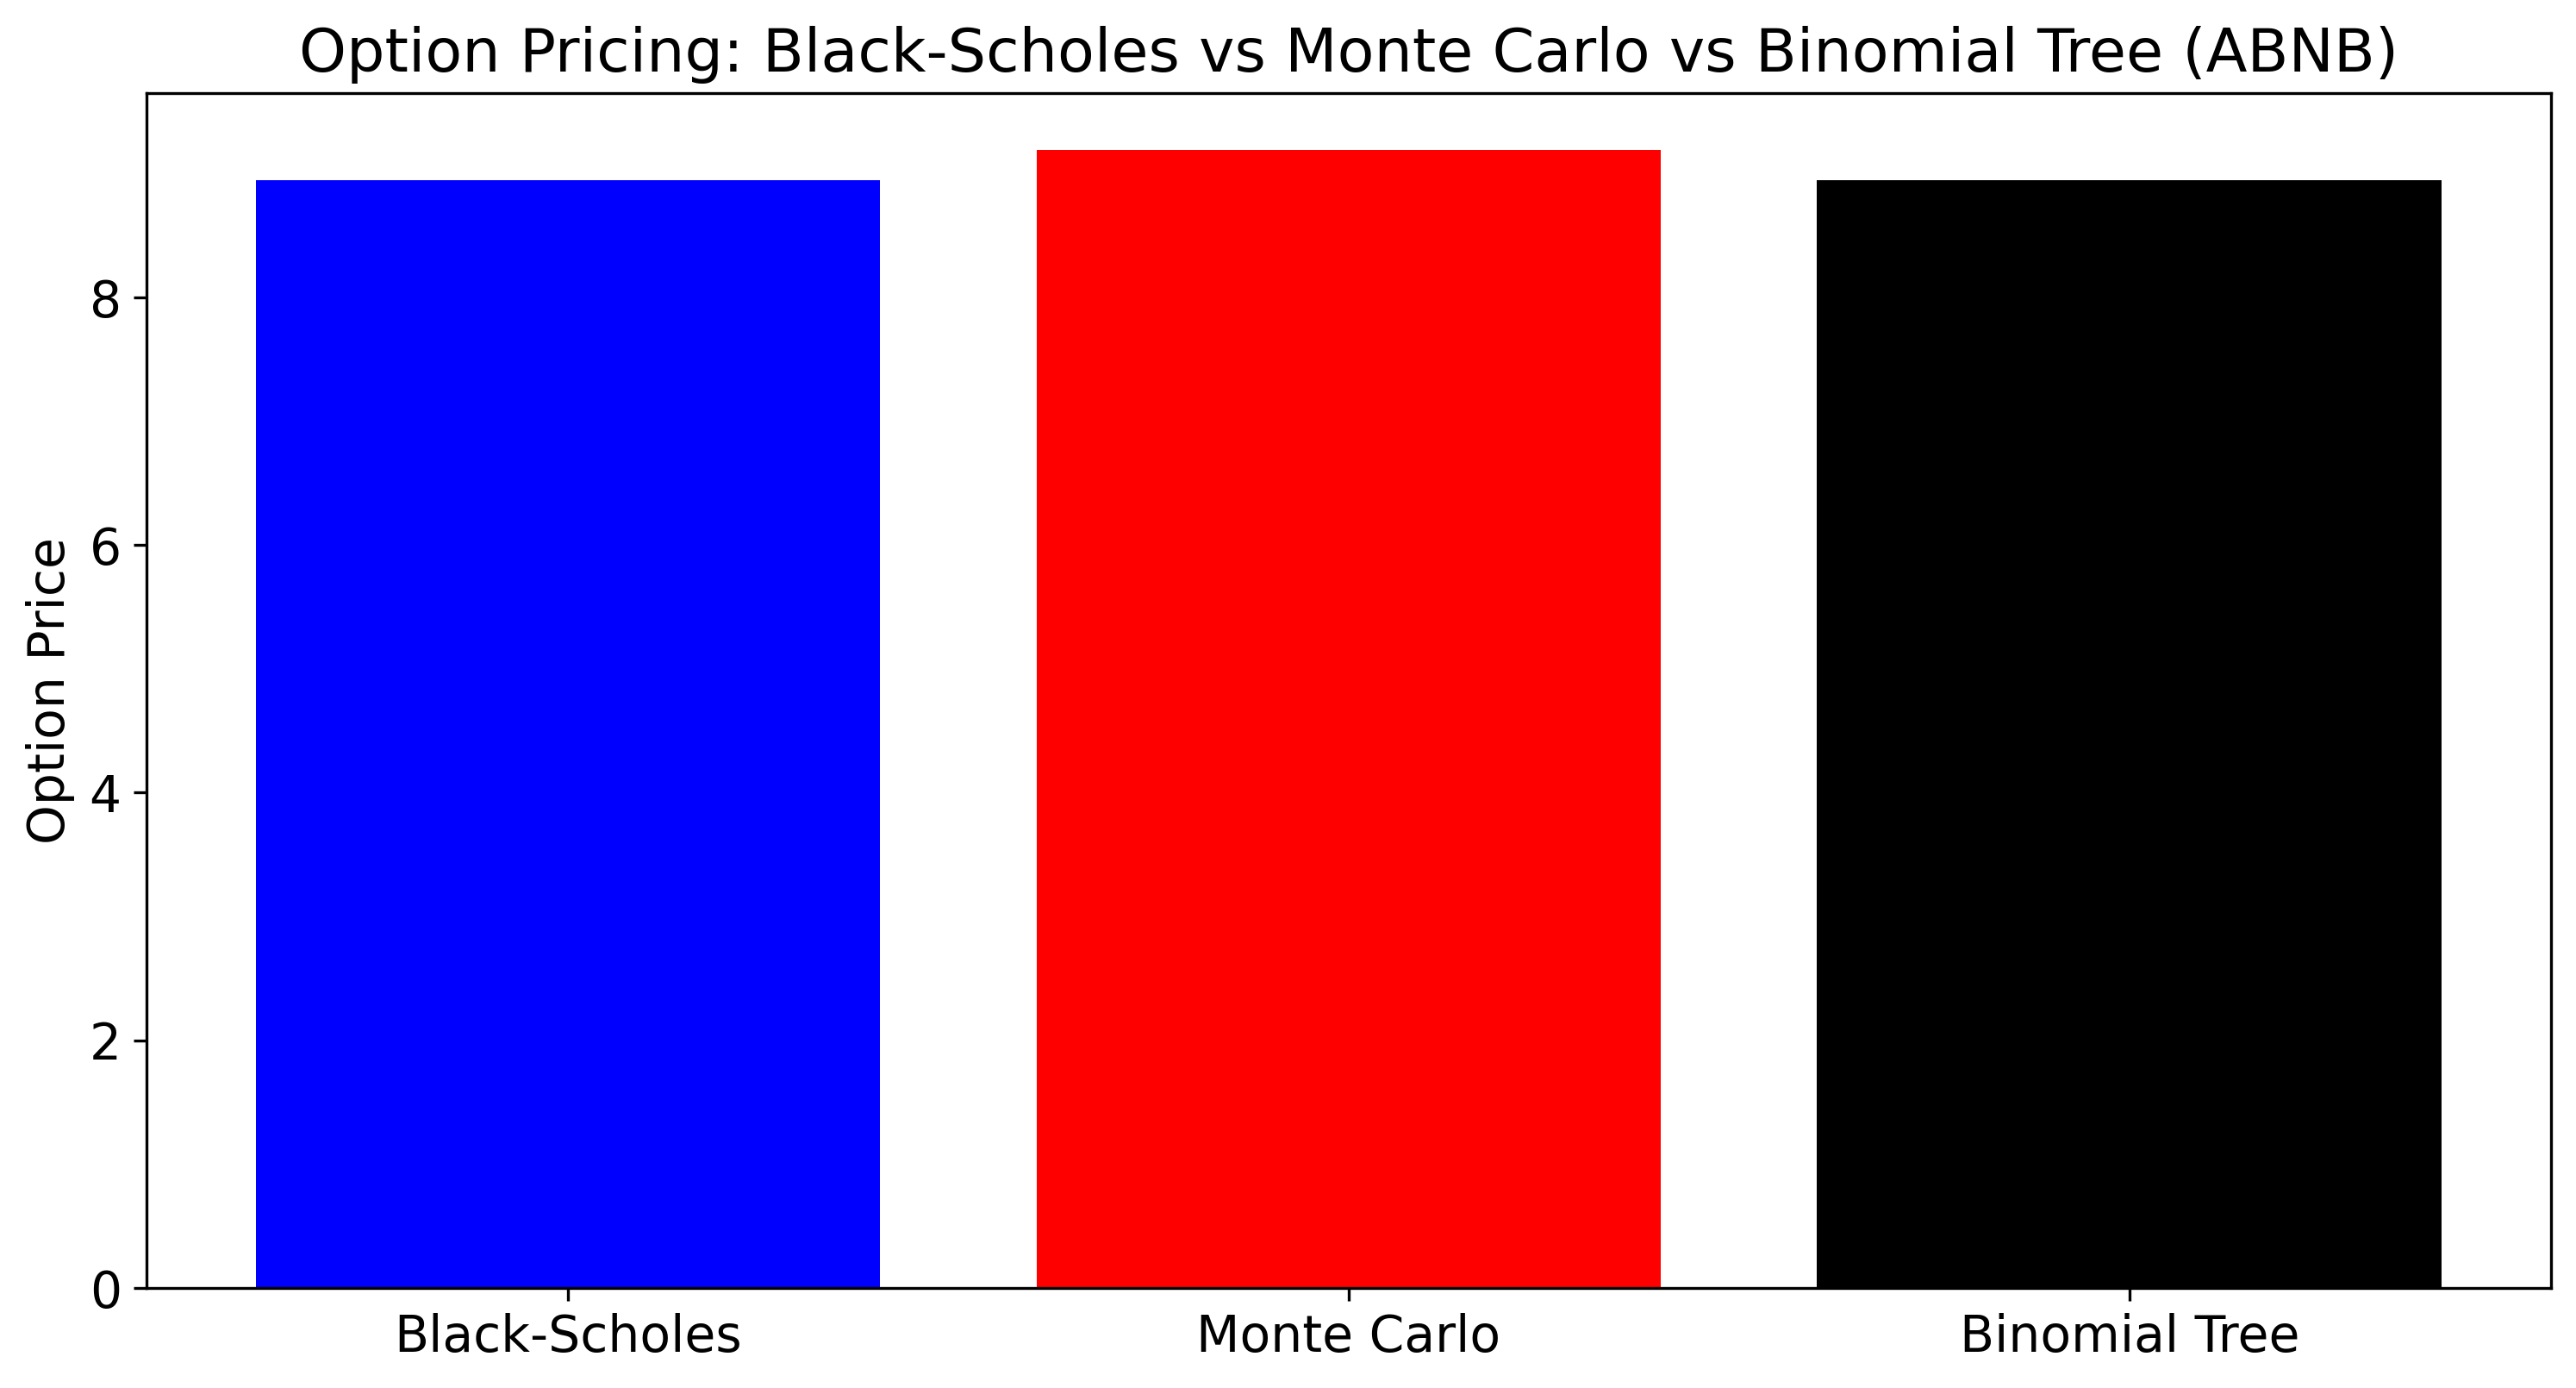

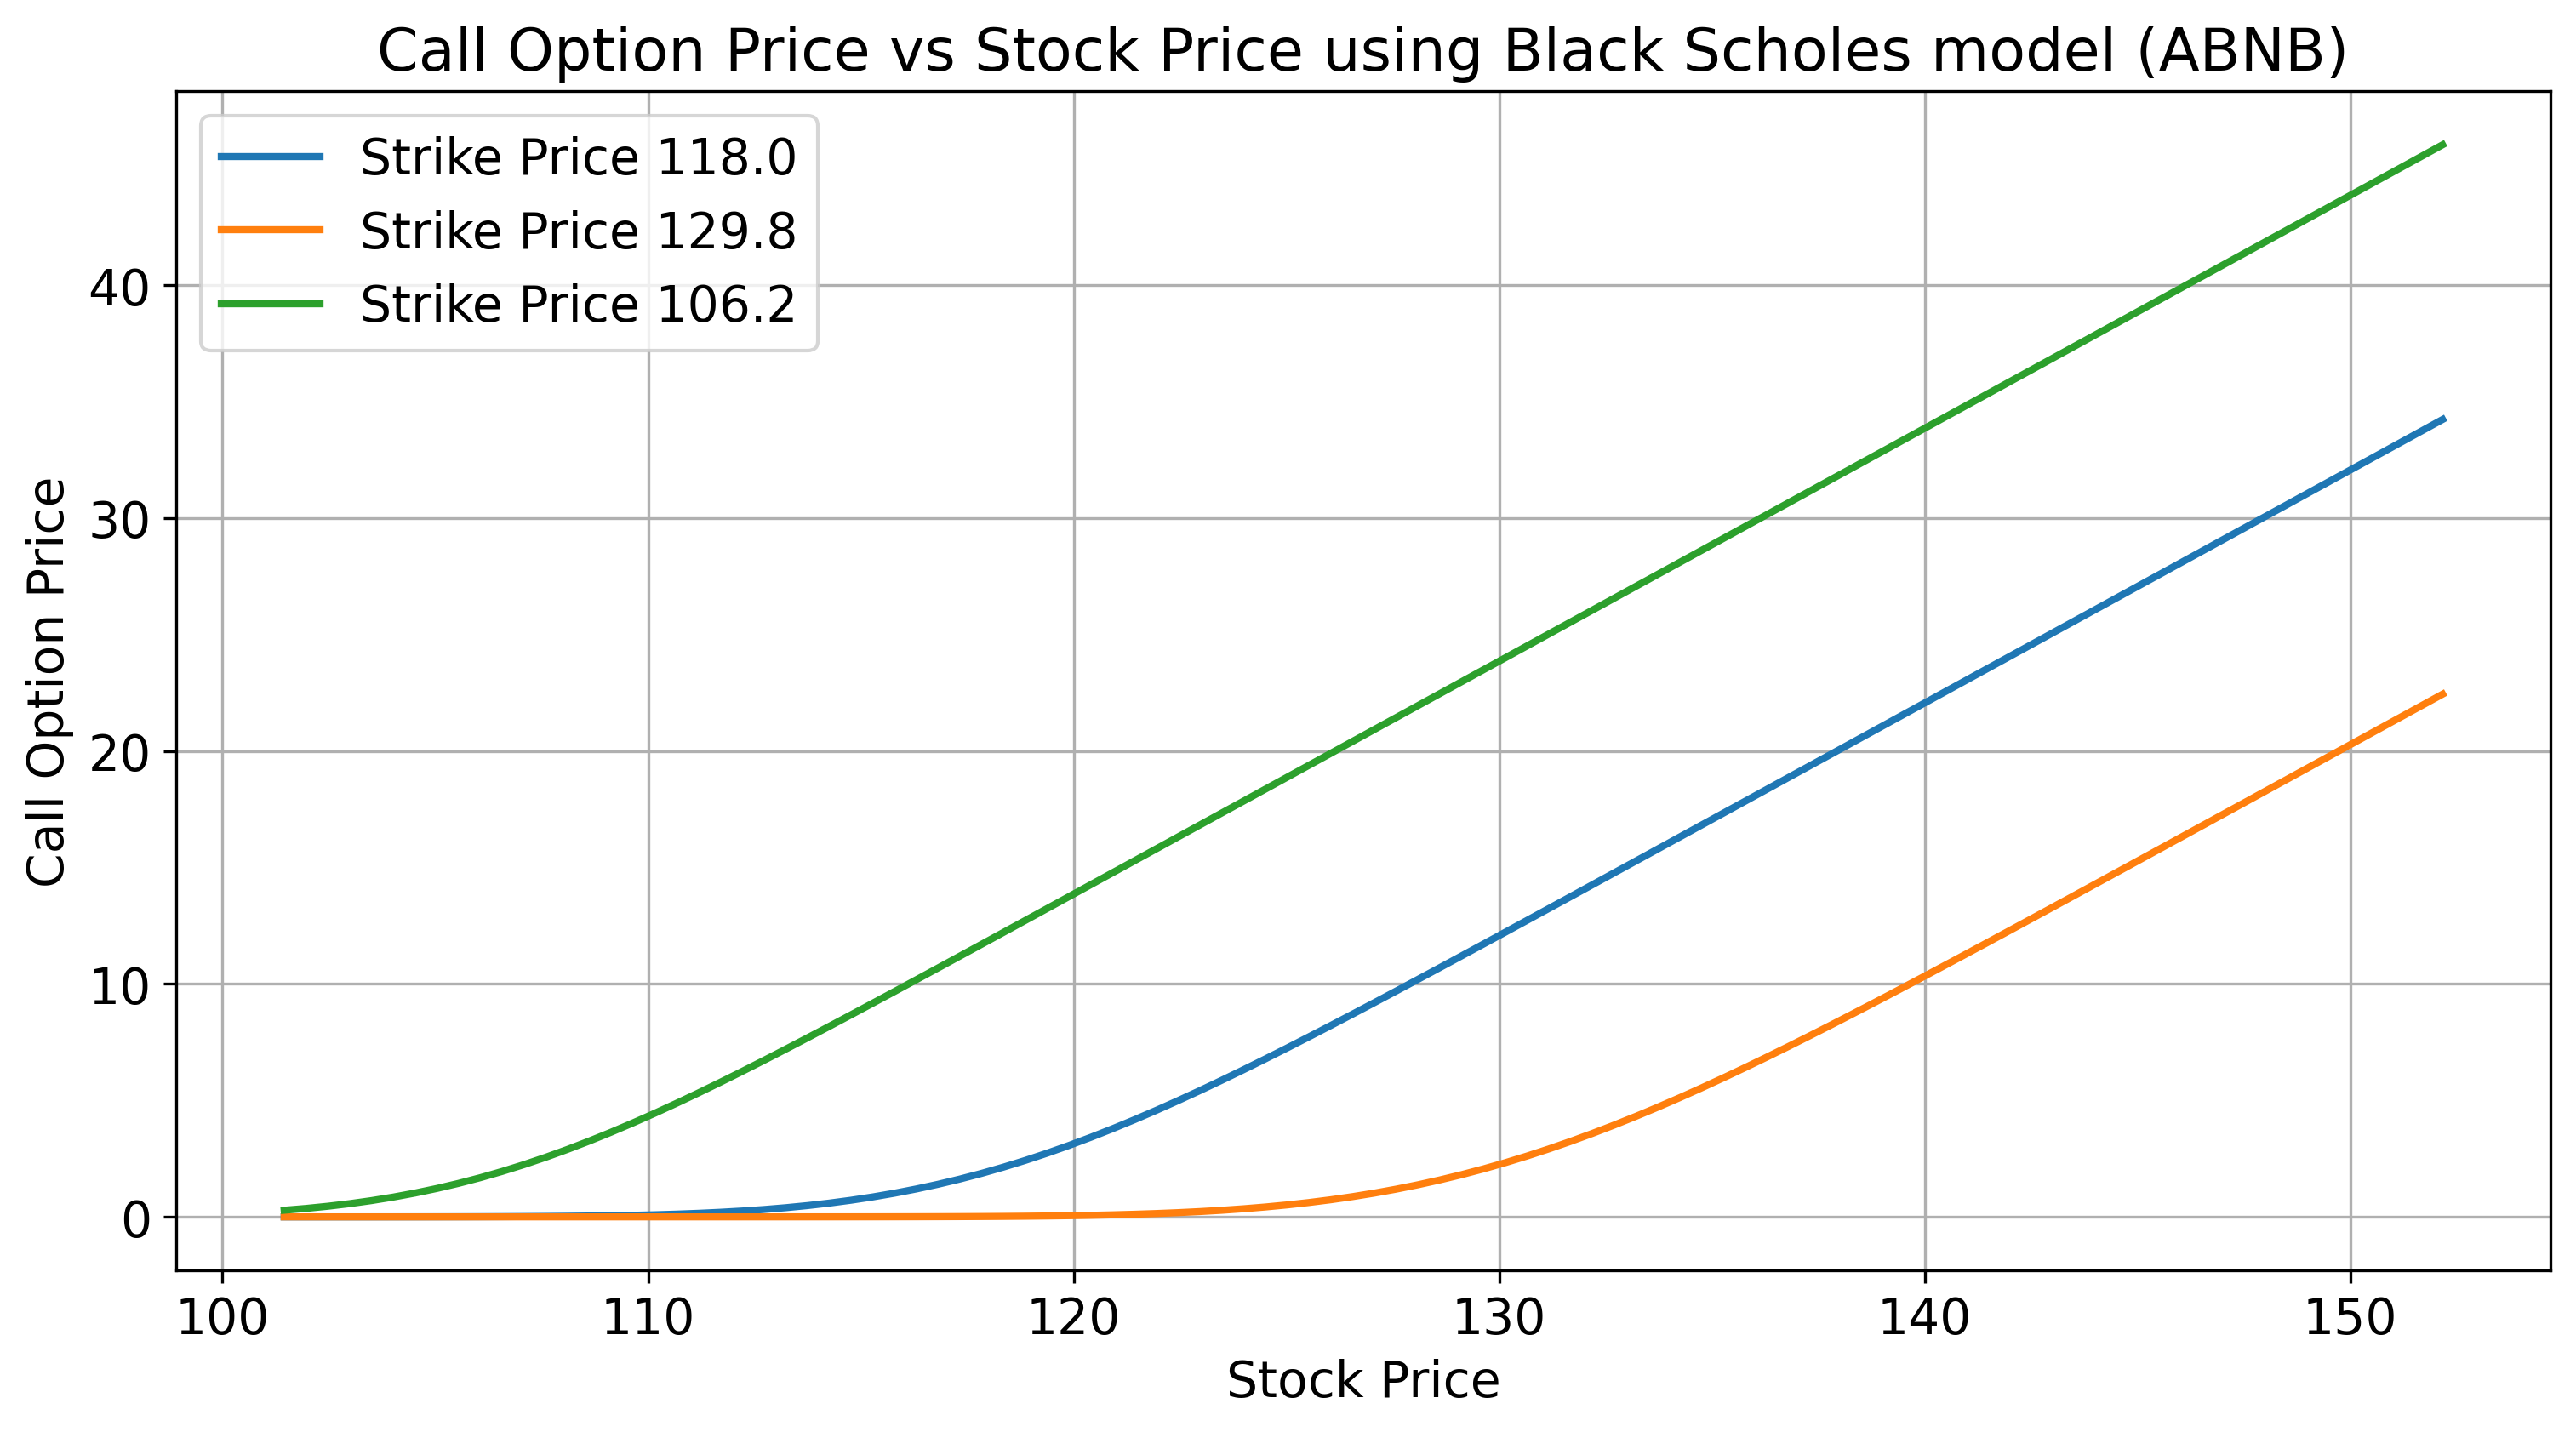

In [1]:
import os
from datetime import datetime

import pandas as pd
from data import DataHandler
from results import ResultsHandler
from greeks_volatility import GreeksVolatility
from models import OptionPricingModels
# from models import ModelType
from plots import OptionPlots
from results import ResultsHandler
from backtester import Backtester


class Main:
    def __init__(self, ticker, output_folder):
        self.ticker = ticker
        self.output_folder = output_folder
        
        # # Initialize the data handler, backtester, and report generator
        # self.data_handler = DataHandler(ticker)
        # self.greeks_volatility = GreeksVolatility()
        # self.backtester = Backtester(ticker, output_folder)
        # self.report_generator = ResultsHandler(ticker, output_folder)

    def run(self, data_file_path, n_data=None, n_each_day=5, risk_free_rate=0.05, num_steps=100, keep_first_n_rows_per_date=False):
        # Step 1: Load and preprocess the data
        self.data_handler.get_stock_data()
        # historical_volatility = self.data_handler.calculate_historical_volatility()
        
        # # Step 2: Run the backtest
        # backtest_results = self.backtester.backtest(data_file_path, n_data, n_each_day, risk_free_rate, num_steps, keep_first_n_rows_per_date)
        
        # # Step 3: Generate a report with the calculated metrics
        # for index, row in backtest_results.iterrows():
        #     # Extract required data for the report
        #     S = row['stock_price']
        #     K = row['strike']
        #     T = (pd.to_datetime(row['expiration']) - pd.to_datetime(row['date'])).days / 365  # Time to maturity
        #     sigma = row['implied_volatility']
        #     market_price = row['mid_price']
        #     bs_price = row['BS_price']
        #     delta = row['BS_delta']  # Assuming you have these calculated
        #     gamma_val = row['BS_gamma']
        #     vega_val = row['BS_vega']
        #     theta_val = row['BS_theta']
        #     rho_val = row['BS_rho']
        #     iv = row['implied_volatility']  # Assuming this is also part of your results
            
        #     # Generate report
        #     self.report_generator.generate_report(S, K, T, risk_free_rate, sigma, bs_price, delta, gamma_val, vega_val, theta_val, rho_val, iv, market_price)

if __name__ == "__main__":
    # User-defined parameters
    # Initialize the OptionPricing class
    # Initialize the OptionPricing class
    # Get the current working directory
    current_dir = os.getcwd()

    # Define the output folder path in the previous directory
    OUTPUT_FOLDER = os.path.join(os.path.dirname(current_dir), "output")

    # For historical volatility
    start_date_volatility = datetime(2023, 1, 1).strftime('%Y-%m-%d')
    end_date_volatility = datetime.today().strftime('%Y-%m-%d')

    # For Monte Carlo
    mc_num_sim = 1000
    bt_num_step = 100

    # AAPL
    # ticker = "AAPL"  # Example ticker
    # option_type = "call"  # Can be 'call' or 'put'
    # K = 207.5  # Example strike price
    # days_to_maturity = 10
    # T = days_to_maturity / 365  # Time to maturity (in years)
    # r = 0.05  # Example risk-free rate
    # market_price = 22.25  # Example market price

    ticker = "ABNB"  # Example ticker
    option_type = "call"  # Can be 'call' or 'put'
    K = 118  # Example strike price
    days_to_maturity = 4
    T = days_to_maturity / 365  # Time to maturity (in years)
    r = 0.05  # Example risk-free rate
    market_price = 11.8  # Example market price


    # Use DataHandler to fetch stock data
    data_handler = DataHandler(ticker)
    data_handler.get_stock_data()
    # Retrieve the stock price (S)
    S = data_handler.S

    # Initialize GreeksVolatility class
    greeks_volatility = GreeksVolatility(S, K, T, r, market_price, ticker, option_type, OUTPUT_FOLDER)
    # def __init__(self, K, T, r, market_price, ticker, option_type, output_folder='output'):

    # Calculate historical volatility
    historical_vol = data_handler.calculate_historical_volatility(start_date_volatility, end_date_volatility)
    print(f"Historical Volatility: {historical_vol}")

    sigma = historical_vol

    # Calculate Black-Scholes price
    models = OptionPricingModels(S, K, T, r, sigma, option_type)
        
    # bs_price = models.calculate_option(type: monte_carlo, )

    bs_price = models.black_scholes_option(q=0)
    print(f"Black-Scholes {option_type} price: {bs_price}")

    # # Calculate Monte Carlo price
    mc_price = models.monte_carlo_option_price(ticker=ticker, output_folder=OUTPUT_FOLDER, num_simulations=mc_num_sim)
    print(f"Monte Carlo {option_type} price: {mc_price[0]}")
    
    # # Calculate Binomial Tree price
    bt_price = models.binomial_tree_option_price(bt_num_step)
    print(f"Binomial Tree {option_type} price: {bt_price}")


    # # Initialize the model with S (stock price), K (strike price), T (time to maturity), r (risk-free rate), and sigma (volatility)
    # model = OptionPricingModels(S, K, T, r, sigma)

    # # Call Black-Scholes option pricing model for a 'call' option
    # bs_price = model.calculate_option_price(
    #     option_type=option_type,
    #     model_type=ModelType.BLACK_SCHOLES, 
    #     q=0  # Dividend yield, optional
    # )
    # print(f"Black-Scholes Call Option Price: {bs_price}")

    # # Call  Monte Carlo option pricing model for a 'call' option
    # mc_price = model.calculate_option_price(
    #     option_type=option_type,
    #     model_type=ModelType.MONTE_CARLO,
    #     num_simulations=1000,  # Pass the number of simulations here
    #     ticker = ticker,
    #     output_folder = OUTPUT_FOLDER
    # )

    # print(f"Monte Carlo Call Option Price: {mc_price[0]}")

    # n_step = 100
    # # Call Binomial Tree option pricing model for a 'call' option
    # bt_price = model.calculate_option_price(
    #     option_type=option_type,
    #     N=100,  # Changed from n_step to N
    #     model_type=ModelType.BINOMIAL_TREE
    # )
    
    # print(f"Binomial Tree Call Option Price: {bt_price}")

    # Generate comparative pricing plot
    plots = OptionPlots(option_type, ticker, OUTPUT_FOLDER)
    plots.comparative_pricing_plot(bs_price, mc_price, bt_price)

    # Calculate Greeks
    # greeks_volatility = GreeksVolatility(ticker, option_type, OUTPUT_FOLDER)
    delta, gamma, vega, theta, rho = greeks_volatility._greeks(sigma)
    print(f"Greeks: Delta={delta}, Gamma={gamma}, Vega={vega}, Theta={theta}, Rho={rho}")
    implied_vol = greeks_volatility.implied_volatility()

    # Generate report
    results_handler = ResultsHandler(ticker, OUTPUT_FOLDER, S, K, T, r, sigma, option_type, delta, gamma, vega, theta, rho, implied_vol, market_price, bs_price, mc_price[0], bt_price, start_date_volatility, end_date_volatility)
    results_handler.generate_report()

    # Plot option prices vs stock price
    option_plots = OptionPlots(option_type, ticker, OUTPUT_FOLDER)
    option_plots.plot_option_price_vs_stock_price(S, K, T, r, sigma)


    # file_path = 'backtesting-data/Optiondataorg/AAPL_2013.csv'
    # backtester = Backtester(ticker, OUTPUT_FOLDER)
    # backtest_results = backtester.backtest(file_path, n_each_day = 1, keep_first_n_rows_per_date=True)

/Users/saeedbidi/Learning/Options/option_pricing/src/models.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(self.S / self.K) + (self.r - q + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
/Users/saeedbidi/Learning/Options/option_pricing/src/models.py:38: RuntimeWarning: invalid value encountered in scalar divide
  p = (np.exp(self.r * dt) - d) / (u - d)  # Risk-neutral probability


Black-Scholes MAE: 0.17161435317431886, RMSE: 0.22527593744431426
Binomial Tree MAE: 0.17452106238553827, RMSE: 0.23285667602605636
Monte Carlo MAE: 0.19723609351700616, RMSE: 0.2619215070177861


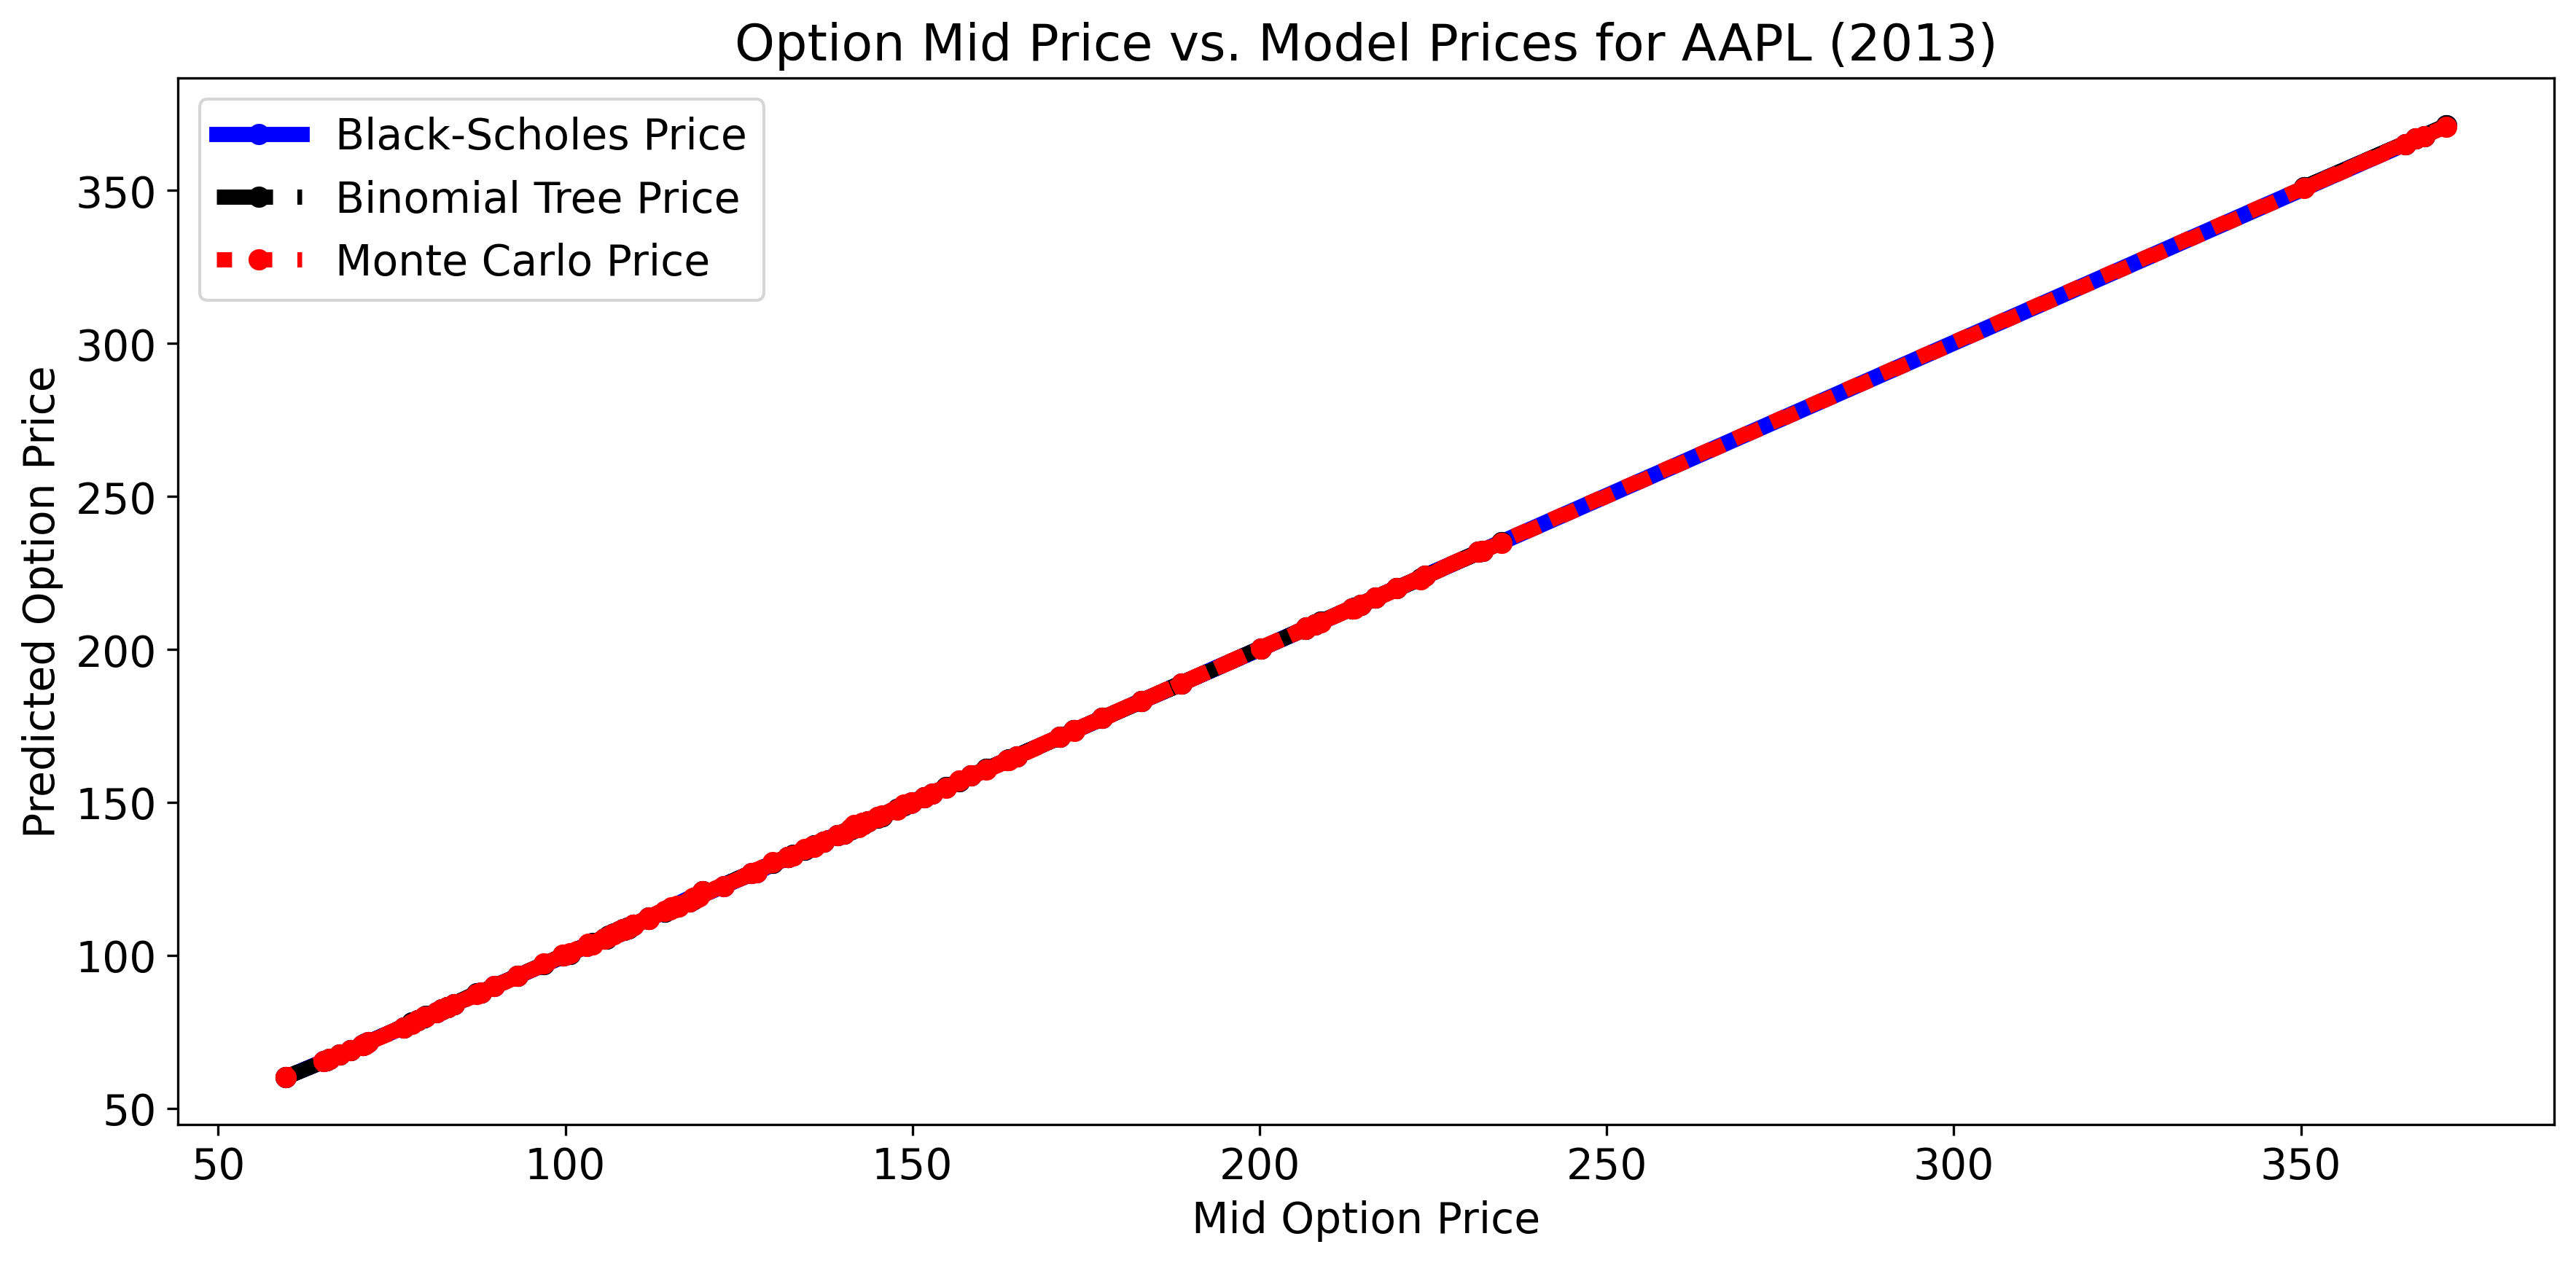

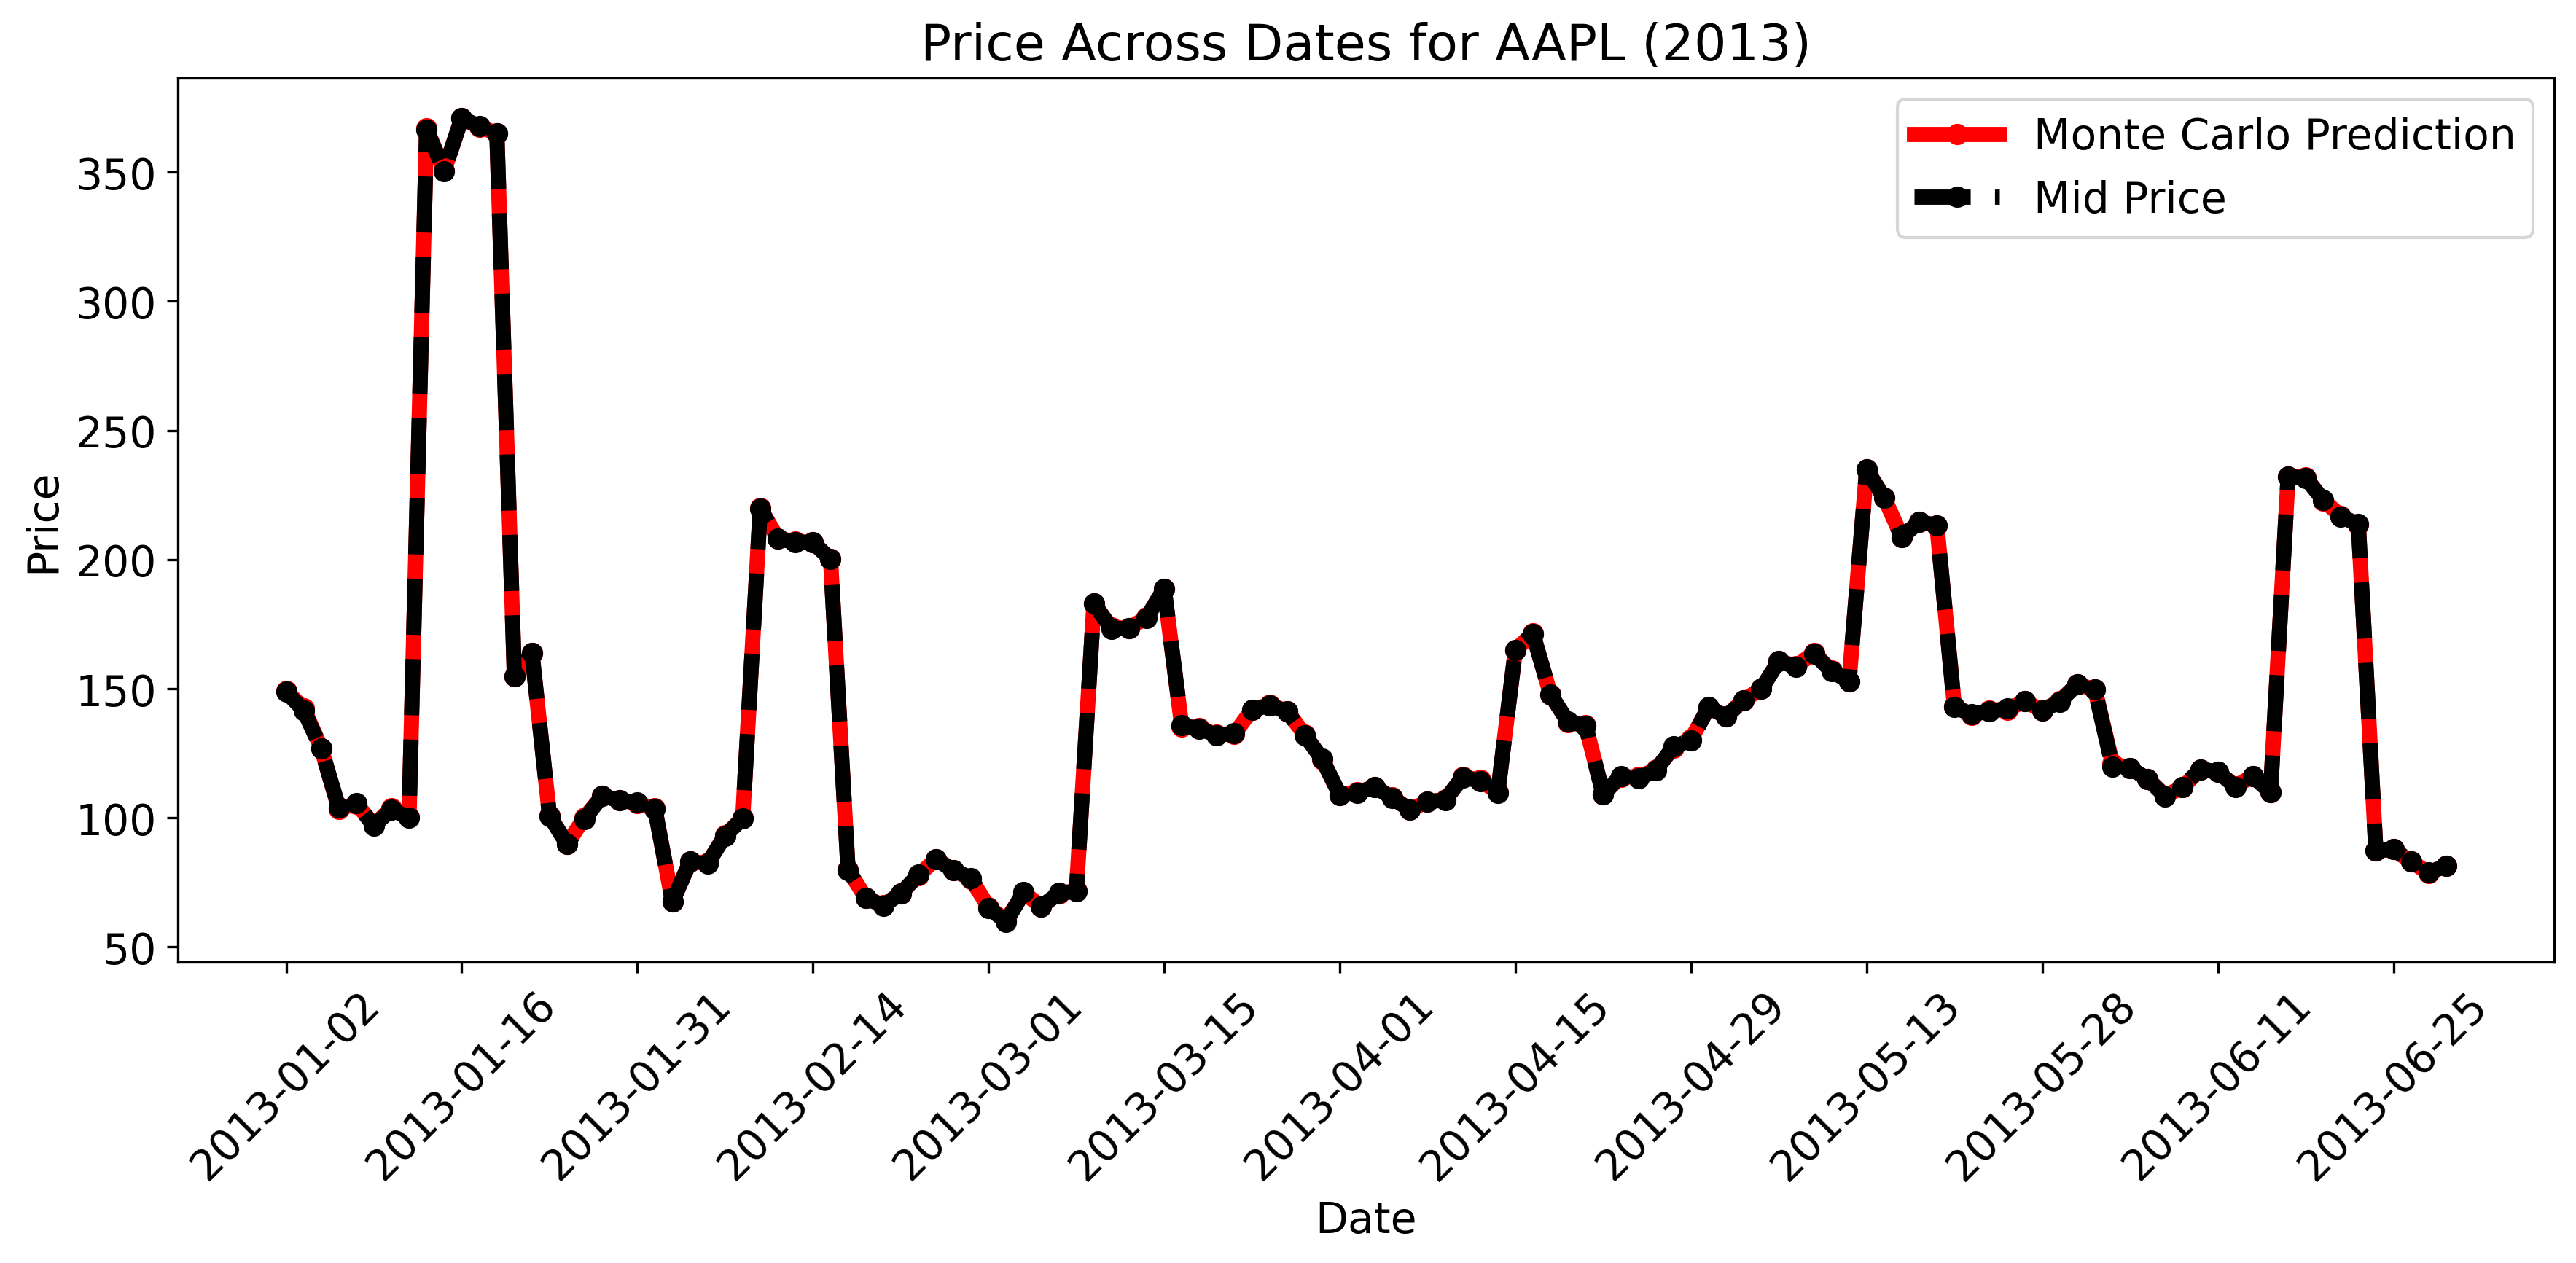

In [3]:
file_path = '../backtesting-data/Optiondataorg/AAPL_2013.csv'
backtester = Backtester(ticker, OUTPUT_FOLDER)
backtest_results = backtester.backtest(file_path, n_each_day = 1, keep_first_n_rows_per_date=True)